                    y1                  y2       DISEASES
0  -1.025036+0.000000j  0.007034+0.000000j            ALL
1  -0.730537+0.000000j  0.362400+0.000000j            ALL
2  -0.894087+0.000000j  0.189710+0.000000j            ALL
3   0.360019+0.000000j -0.935084+0.000000j            AML
4   0.676577+0.000000j  0.248293+0.000000j  Breast Cancer
..                 ...                 ...            ...
95 -1.013084+0.000000j -0.167768+0.000000j            ALL
96  0.333058+0.000000j  0.316199+0.000000j  Breast Cancer
97  0.553787+0.000000j -0.490518+0.000000j   Colon Cancer
98  0.517543+0.000000j  0.632173+0.000000j  Breast Cancer
99  0.437161+0.000000j  0.774492+0.000000j  Breast Cancer

[100 rows x 3 columns]
          y1        y2       DISEASES
0  -8.743556 -1.022605            ALL
1  -8.748728 -0.726622            ALL
2  -8.771953 -0.890126            ALL
3  -8.610580  0.355515            AML
4  -8.709753  0.679654  Breast Cancer
..       ...       ...            ...
95 -8.732029 -

/Users/saikumaraindla/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


          y1        y2       DISEASES
0  -5.478637 -8.628731            ALL
1  -3.939735 -8.354574            ALL
2  -4.812729 -8.378590            ALL
3   1.968669 -4.013603            AML
4   3.891144  1.966271  Breast Cancer
..       ...       ...            ...
95 -4.767149 -9.145761            ALL
96  2.783372  1.824896  Breast Cancer
97  0.204972 -1.271221   Colon Cancer
98  3.297650  2.938870  Breast Cancer
99  3.004548  3.324169  Breast Cancer

[100 rows x 3 columns]


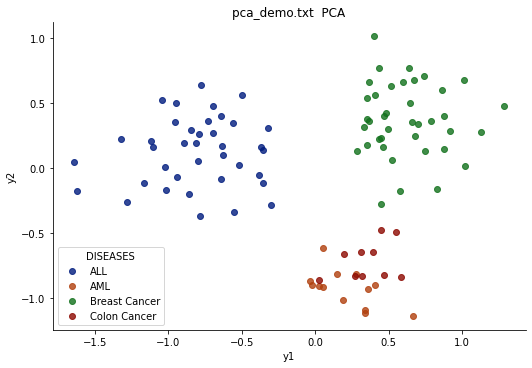

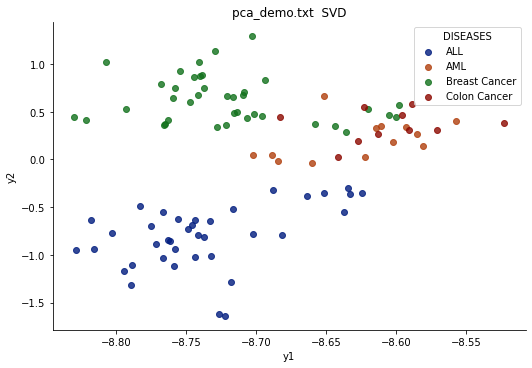

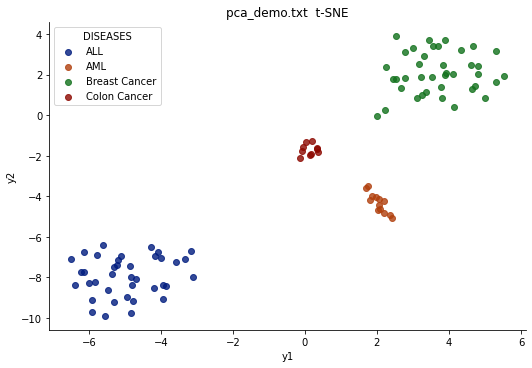

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import sys
from numpy.linalg import svd
from sklearn.manifold import TSNE

#PCA Implementation
def pca_part(features):
    mean_vector = pd.DataFrame(features.mean(axis = 0))
    mean_vector = pd.DataFrame(mean_vector.to_numpy().T)
    mean_vector = mean_vector.append([mean_vector.iloc[0]]*(len(features)-1))
    mean_vector = mean_vector.reset_index(drop=True)
    Adjust_data = features.to_numpy() - mean_vector.to_numpy()
    CoVar_Mat = 1/(len(features)-1)
    CoVar_Mat = CoVar_Mat * np.matmul(Adjust_data.T,Adjust_data)
    eigen_values, eigen_vectors = np.linalg.eig(CoVar_Mat)
    eigen_values = list(eigen_values)
    top_eigen_indexes = sorted(range(len(eigen_values)), key = lambda i : eigen_values[i], reverse=True)[:2]
    top_eigen_vectors = eigen_vectors[:,top_eigen_indexes]
    new_data = np.matmul(Adjust_data,top_eigen_vectors)
    return new_data


#Scatter Plots
def plots(new_data,file):
    df_new = pd.DataFrame({'y1':np.array(new_data)[:,0], 'y2':np.array(new_data)[:,1], 'DISEASES': diseases})
    print(df_new)
    sns.lmplot(x='y1', y='y2', data=df_new, fit_reg=False,hue='DISEASES',palette = 'dark', height=5,aspect = 1.5,legend_out = False)
    plt.title(file)

#SVD Implementation
def svd_part(features):
    u,s,v = svd(features,full_matrices = False)
    data = np.dot(u,np.diag(s))
    return data

#t-SNE Implementation
def t_sne_part(features):
    data = TSNE(n_components=2)
    data = data.fit_transform(features)
    return data


#Pass the file name as command line arguments
file = 'pca_demo.txt'

#Read the file and create the dataframe
df = pd.read_csv(file,sep="\t", header=None)

#labels
diseases = (df[len(df.columns) - 1]).to_numpy()

#Actual features to do the dimensionality reduction
features = df.iloc[:,0:len(df.columns)-1]



#Principal Component Analysis Function
pca_data = pca_part(features)

# print(pca_data)

plots(pca_data,file+"  PCA")

#SVD function
SVD_data = svd_part(features.to_numpy())
plots(SVD_data,file+"  SVD")

#t_SNE function
t_SNE_data = t_sne_part(features.to_numpy())
plots(t_SNE_data,file+"  t-SNE")
plt.show()